In [1]:
!pip3 install -U ucimlrepo 

In [69]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [64]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
   
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [3]:
#Training Data - Features
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
#Checking Empty Values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [5]:
#Training Data - Target Label
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [6]:
#Checking Empty Values
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [7]:
#Scaling the training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshaping y_train to avoid an error formed as it is not a 1D array
y_train = y_train.iloc[:, 0]

In [72]:
# Paramterer Grid for each Model

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 2000, 3000]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_svm_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}


In [22]:
# Create a list of models with their respective Parameter grids

models_param_grid = [
    (LogisticRegression(), param_grid_lr),
    (RandomForestClassifier(), param_grid_rf),
    (KNeighborsClassifier(), param_grid_knn),
    (SVC(kernel='linear'), param_grid_svm_linear),
    (SVC(kernel='rbf'), param_grid_svm_rbf)
]

In [82]:
# Empty list for storing all models and their accuracy

models = []
accuracy = []

# Loop through each model and parameter pair from the models_param_grid List

for model, param_grid in models_param_grid:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy
    
    best_model = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_
    
    # Store the best model and its accuracy
    
    models.append(best_model)
    accuracy.append(best_accuracy)

In [83]:
# Getting the name of the model along with the kernel for SVM

model_names = [type(model).__name__ + f" ({model.kernel})" if isinstance(model, SVC) else type(model).__name__ for model in models]

In [84]:
model_names

['LogisticRegression',
 'RandomForestClassifier',
 'KNeighborsClassifier',
 'SVC (linear)',
 'SVC (rbf)']

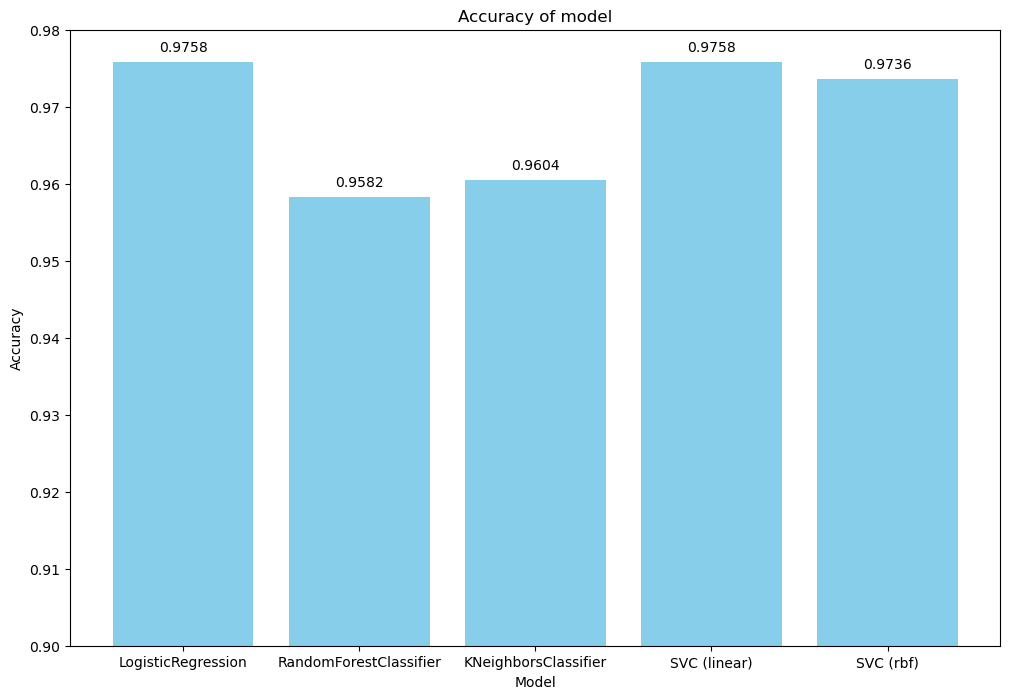

In [85]:
# Plotting Accuracy of each model

plt.figure(figsize=(12,8))
bars = plt.bar(model_names, accuracy, color='skyblue')
plt.ylim(0.90, 0.98)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of model')

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f'{acc:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
#Obtaining the data set as csv file for storage

df = pd.concat([X, y])
df.to_csv("BreastCancerData.csv")

In [ ]:
df

In [88]:
score = max(accuracy)

print("The best models for identifying whether the Tumour is Malignant or begign are Logistic Regression and SCV (linear) with an accuracy of {:.2f}%".format(score*100))

The best models for identifying whether the Tumour is Malignant or begign are Logistic Regression and SCV (linear) with an accuracy of 97.58%
